In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

data = pd.read_csv("D:/VIT/data mining/project/bank.csv")
data.head(10)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
5,"35;""management"";""single"";""tertiary"";""no"";747;""..."
6,"36;""self-employed"";""married"";""tertiary"";""no"";3..."
7,"39;""technician"";""married"";""secondary"";""no"";147..."
8,"41;""entrepreneur"";""married"";""tertiary"";""no"";22..."
9,"43;""services"";""married"";""primary"";""no"";-88;""ye..."


In [2]:
data = pd.read_csv("D:/VIT/data mining/project/bank.csv",sep=';',header=0)
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


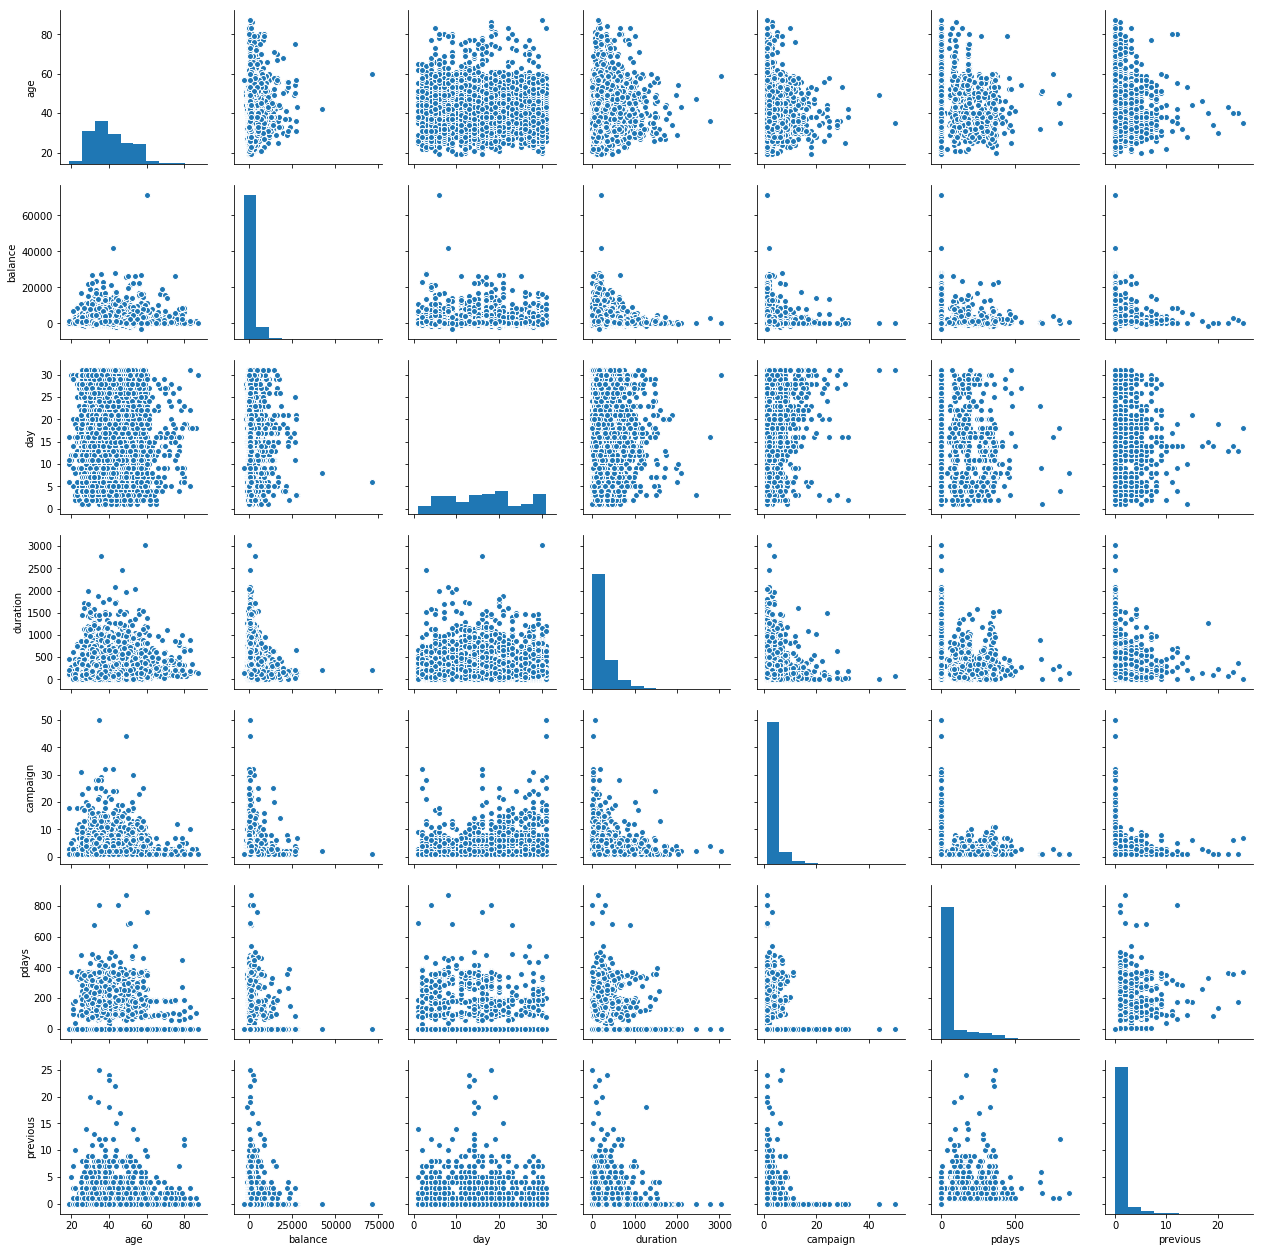

In [3]:
sns.pairplot(data)


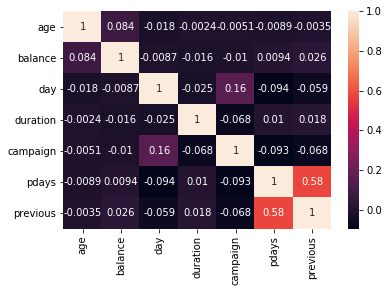

In [4]:
sns.heatmap(data.corr(),annot=True)

In [5]:
#the highest correlation we have is 0.58 which is not enough for us to be able to drop a variable as redunant

Since we are going to be performing KNN classification, we need to have numeric data but we see that we have a lot of categorical attributes but we are lucky in the fact that the attributes have a vague heirarchy and thus it would be easier to assign numeric values to it

In [6]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
mar_col = {'married':1,'single':0,'divorced':2}
data['marital']=data['marital'].map(mar_col)

In [9]:
edu_col={'primary':0,'secondary':1,'tertiary':2,'unknown':-1}
data['education']=data['education'].map(edu_col)

In [10]:
default_col={'no':0,'yes':1}
data['default']=data['default'].map(default_col)

In [11]:
housing_col={'no':0,'yes':1}
data['housing']=data['housing'].map(housing_col)

In [12]:
loan_col = {'no':1,'yes':0}
data['loan']=data['loan'].map(loan_col)

In [13]:
data[data['poutcome']=="unknown"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,0,0,1787,0,1,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,1,2,0,1476,1,0,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,1,0,0,1,1,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,1,1,0,147,1,1,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,1,2,0,221,1,1,unknown,14,may,57,2,-1,0,unknown,no


In [14]:
data=data.drop(['poutcome'],axis=1)

In [15]:
data=pd.get_dummies(data,columns=["job","contact","month"])

In [16]:
y_col = {'no':0,'yes':1}
data['y']=data['y'].map(y_col)


In [17]:
y=data['y']
data=data.drop('y',axis=1)

In [18]:
data.insert(39,"class",y,allow_duplicates=False)

In [19]:
data.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,class
0,30,1,0,0,1787,0,1,19,79,1,...,0,0,0,0,0,0,0,1,0,0
1,33,1,1,0,4789,1,0,11,220,1,...,0,0,0,0,0,1,0,0,0,0
2,35,0,2,0,1350,1,1,16,185,1,...,0,0,0,0,0,0,0,0,0,0
3,30,1,2,0,1476,1,0,3,199,4,...,0,0,0,1,0,0,0,0,0,0
4,59,1,1,0,0,1,1,5,226,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
data.to_csv("Processed_data1.csv",index=False)

In [27]:
import csv
import random
import math
import operator
 
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(1,len(dataset)-1):
	        for y in range(40):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

In [28]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 


In [29]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 


In [30]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 


In [31]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
                correct += 1
    return (correct/float(len(testSet))) * 100.0
    


In [32]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.7
    loadDataset('Processed_data1.csv', split, trainingSet, testSet)
    print ("Train set: " + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][12]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()

Train set: 3148
Test set: 1372
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, 

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, act

In [168]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.7
    loadDataset('Processed_data1.csv', split, trainingSet, testSet)
    print ("Train set: " + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 6
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()

Train set: 3127
Test set: 1393
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, 

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

In [169]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.7
    loadDataset('Processed_data1.csv', split, trainingSet, testSet)
    print ("Train set: " + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 10
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()

Train set: 3133
Test set: 1387
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, 

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

In [170]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.8
    loadDataset('Processed_data1.csv', split, trainingSet, testSet)
    print ("Train set: " + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 15
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()

Train set: 3627
Test set: 893
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, a

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, act

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
Accuracy: 88.12989921612542%
